In [1]:
import numpy as np
from numpy.polynomial import chebyshev as C

In [421]:
grid = np.transpose(get_disc_grid(100).reshape((100, 100, -1)), (1, 0, 2))[::-1,:]

In [452]:
def get_disc_grid(disc_pts, x_rec=None):
    if x_rec is None:
        x_rec = np.arange(0, 1, 1 / disc_pts)
    arrays = [x_rec, x_rec]
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

In [387]:
import copy

In [472]:
def sobolev(x_grid, f, cn=3):
    sobolev_norm_alphas = []
    cur_ders = [f]
    for _ in range(cn+1):
        sobolev_norm_alpha = np.max([np.max(np.abs(C.chebval2d(x_grid[:,0], x_grid[:,1], der))) for der in cur_ders])
        sobolev_norm_alphas.append(sobolev_norm_alpha)

        next_ders = []
        for der in cur_ders:
            next_ders.append(copy.deepcopy(C.chebder(der)))
            for axis in range(len(f.shape)):
                next_ders.append(C.chebder(der, axis=axis))
        cur_ders = next_ders
    print(sobolev_norm_alphas)
    return np.sum(sobolev_norm_alphas)

In [355]:
def f1D(x):
    return np.exp(-x ** 2)

In [399]:
def f2D(x, y):
    return x ** 2 + y ** 2

In [410]:
K = 100
test_pts2D = get_disc_grid(None, C.chebpts1(K))
cheb_vals2D = f2D(test_pts2D[:,0], test_pts2D[:,1]).reshape((K, K))

In [360]:
"""
f = f(end:-1:1,:);
A = size(f); N = A(1); 
if exist('A(3)', 'var') && A(3)~=1
    for i=1:A(3)
        a(:,:,i) = sqrt(2/N) * dct(f(:,:,i));
        a(1,:,i) = a(1,:,i) / sqrt(2);
    end
else
    a = sqrt(2/N) * dct(f(:,:,i));
    a(1,:)=a(1,:) / sqrt(2);
end
"""

test_pts  = C.chebpts1(K)
cheb_vals = f1D(test_pts)[::-1]

In [361]:
DFT = np.fft.fft(np.hstack((cheb_vals, cheb_vals[K - 2: 0: -1]))).real / (2 * K - 2)

chebyshev_coefficients = DFT[:K] * 2
chebyshev_coefficients[0]  /= 2
chebyshev_coefficients[-1] /= 2

In [362]:
test_xs = np.arange(-0.5, 0.5, 0.05)
true    = f1D(test_xs)
recon   = C.chebval(test_xs, chebyshev_coefficients)

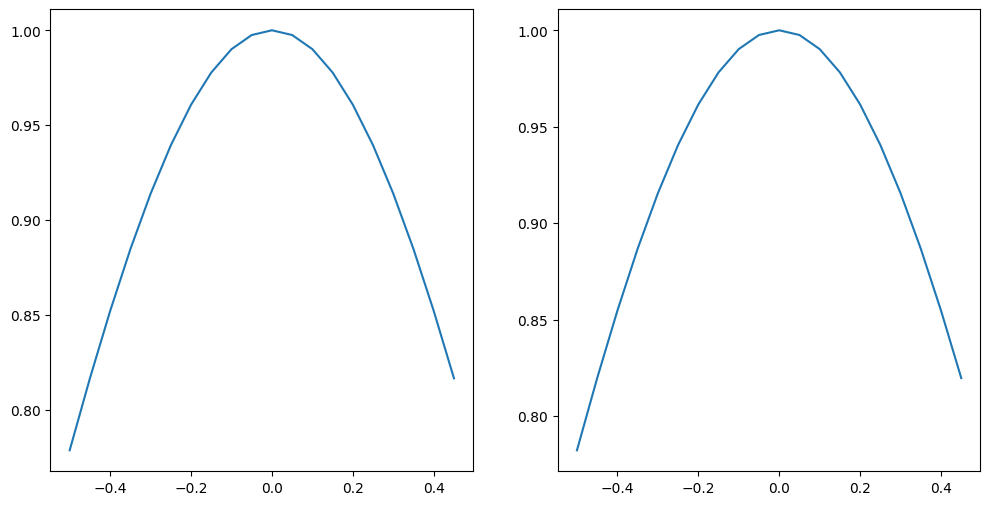

In [363]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(test_xs, true)
ax[1].plot(test_xs, recon)

In [380]:
f       = chebyshev_coefficients
df_dx   = C.chebder(f)
df_dxx  = C.chebder(df_dx)
df_dxxx = C.chebder(df_dxx)

f_val       = C.chebval(test_xs, f)
df_dx_val   = C.chebval(test_xs, df_dx)
df_dxx_val  = C.chebval(test_xs, df_dxx)
df_dxxx_val = C.chebval(test_xs, df_dxxx)

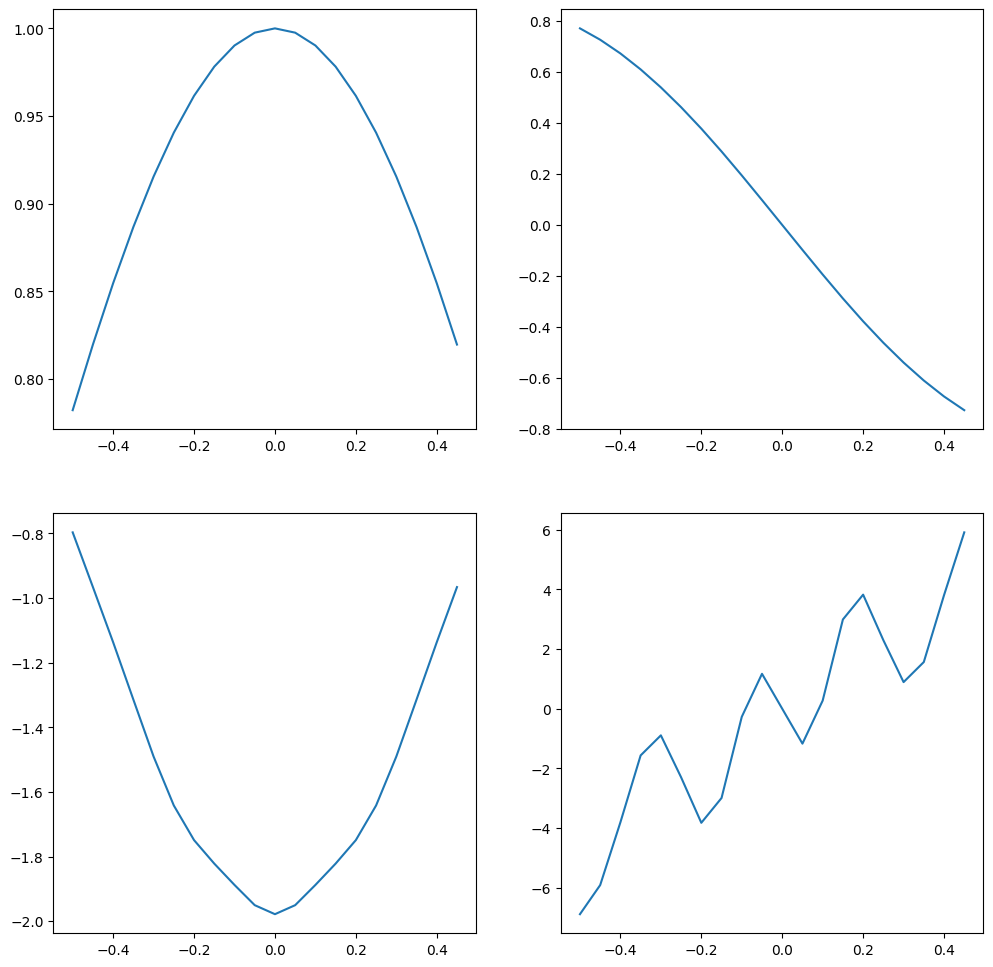

In [381]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0,0].plot(test_xs, f_val)
ax[0,1].plot(test_xs, df_dx_val)
ax[1,0].plot(test_xs, df_dxx_val)
ax[1,1].plot(test_xs, df_dxxx_val)

In [493]:
K = 10

chebyshev_coefficients_2D = np.zeros((K, K))
chebyshev_coefficients_2D[0,0] = 1
chebyshev_coefficients_2D[2,2] = 1
chebyshev_coefficients_2D[1,1] = 1

In [501]:
N = 100
x_grid = (get_disc_grid(N) - 0.5) * 2

In [502]:
f       = chebyshev_coefficients_2D
df_dx   = C.chebder(f, axis=0)
df_dxx  = C.chebder(df_dx, axis=1)
df_dxxx = C.chebder(df_dxx, axis=1)

In [503]:
f_val       = C.chebval2d(x_grid[:,0], x_grid[:,1], f).reshape((N, N))
df_dx_val   = C.chebval2d(x_grid[:,0], x_grid[:,1], df_dx).reshape((N, N))
df_dxx_val  = C.chebval2d(x_grid[:,0], x_grid[:,1], df_dxx).reshape((N, N))
df_dxxx_val = C.chebval2d(x_grid[:,0], x_grid[:,1], df_dxxx).reshape((N, N))

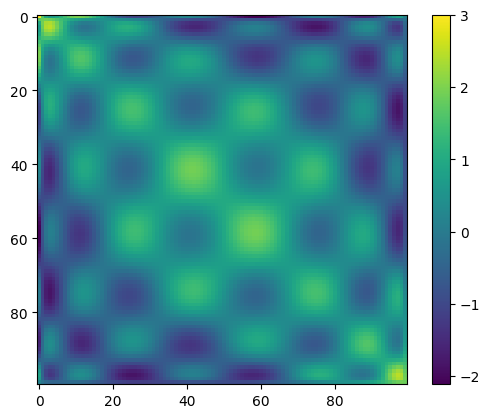

In [507]:
plt.imshow(f_val)
plt.colorbar()

In [473]:
sobolev(x_grid, chebyshev_coefficients_2D)

[2.90208404, 4.792392, 16.6816, 15.84]


40.216076040000004